# Predicting heartdisease using machine learning 

We'll go through following features:

1) Problem Defination

2) Data

3) Evaluation

4) features

5) Modelling

6) Experimentation 

## 1.Problem Definition 

This notebook looks into various python based machine learning libraries in an attempt to build a machine learning model which is able to predict whether a person has heart disease or not


## 2.Data

The data is taken from Cleaveland data from UCI Machine learning repository https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available in https://www.kaggle.com/code/asimislam/heart-disease-uci-eda-and-ml-w-lr/notebook#1.--Data-Collection-


## 3.Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has a heart disease during POC ,we'll further pursue the data

## 4.Features

info about the features in your data 

**Create data dictionary**

1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
    
4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5.chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern

6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes

7.restecg - resting electrocardiographic result
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
    
8.thalach - maximum heart rate achieved

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11.slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downslopins: signs of unhealthy heart
    
12.ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13.thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)



# Preparing the tools

we're going to use numpy,pandas,matplotlib for data analysis and manipulation 

In [1]:
# Import all the tools required 

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data 

In [2]:
df = pd.read_csv(" heart-disease.csv")
df.shape

(303, 14)

## Data Exploration

find out more about the data.

1.What questions are you trying to solve?

2.What kind of data do we have and how do we treat different types of data?

3.find missing data and ways to fill  the data

4.Where are the outliers?

5.add, change or remove features to get more out of your data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# lets find out how many value of each class

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

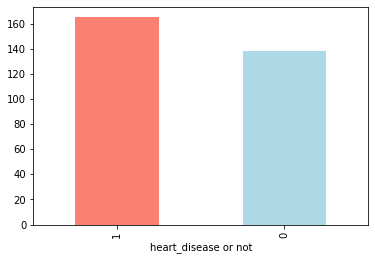

In [5]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);
plt.xlabel('heart_disease or not');

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# has missing values or not
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease Frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

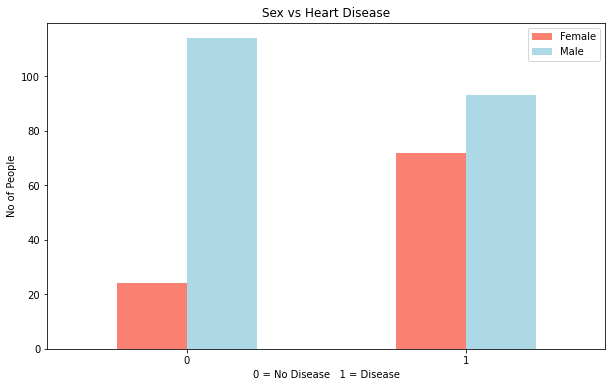

In [11]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue'],figsize=(10,6))
plt.title('Sex vs Heart Disease')
plt.xlabel('0 = No Disease   1 = Disease')
plt.ylabel('No of People')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

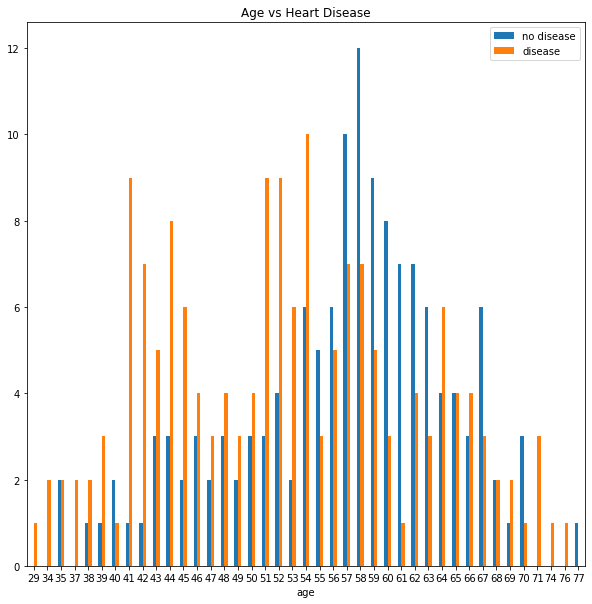

In [12]:

pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(10,10))
plt.legend(['no disease','disease'])
plt.title('Age vs Heart Disease')
plt.xticks(rotation=0);

In [13]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


## Age vs Heart rate For a Heart Disease

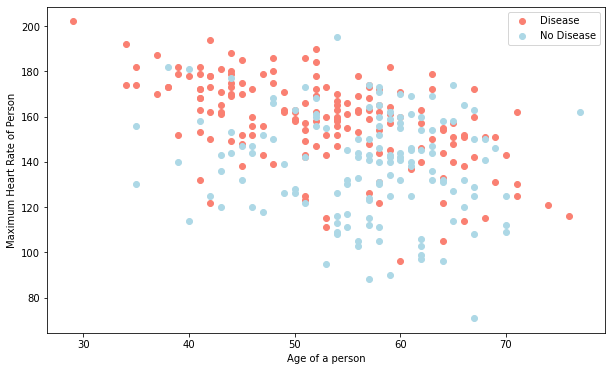

In [14]:
plt.figure(figsize=(10,6));

# plot with heart disease positive 

plt.scatter(df[df.target==1].age,df[df.target==1].thalach,color='salmon')

# plot with heart disease negetive
plt.scatter(df[df.target==0].age,df[df.target==0].thalach,color='lightblue')

plt.xlabel('Age of a person')
plt.ylabel('Maximum Heart Rate of Person')
plt.legend(['Disease','No Disease'])

In [15]:
df[df.target==1].age

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

<AxesSubplot:ylabel='Frequency'>

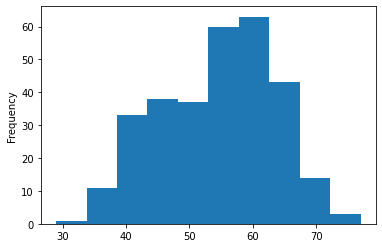

In [16]:
# check the distribution of age column
df.age.plot.hist()

## Heart Disease per chest pain type

cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    
    1: Atypical angina: chest pain not related to heart
    
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


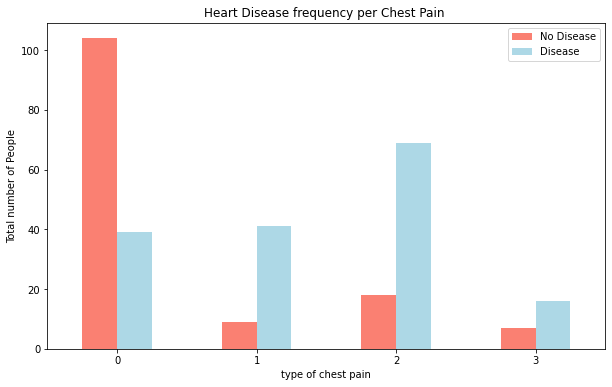

In [18]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','lightblue'],figsize=(10,6))

plt.title('Heart Disease frequency per Chest Pain ')

plt.legend(['No Disease','Disease'])

plt.xlabel('type of chest pain')

plt.ylabel('Total number of People')

plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


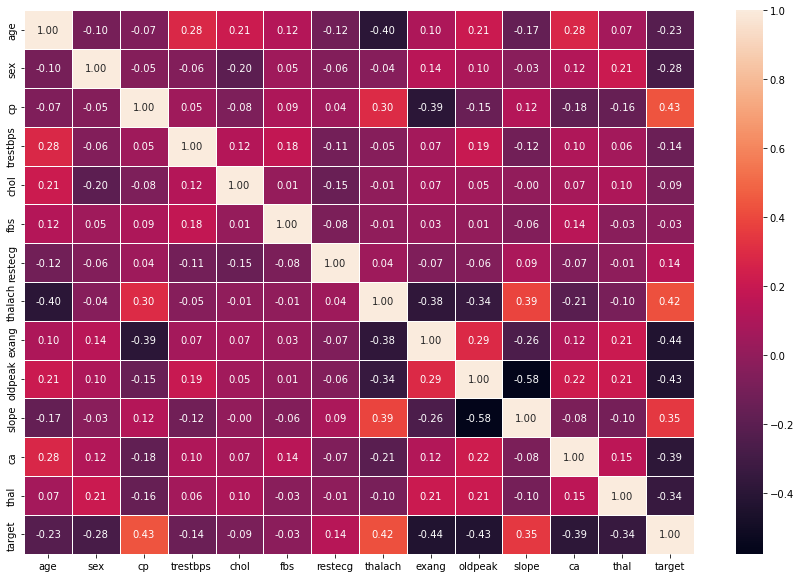

In [21]:
# make correlation matrix more attractive

corr_matrix = df.corr()

ax,fig = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt='.2f')

## 5. Modelling

In [22]:
# split the data in X and y 

X = df.drop('target',axis=1)

y = df.target

In [23]:
# split the data into train and test sets 

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [24]:
len(X_train),len(X_test)

(242, 61)

Now we've splited the data into test and train sets 

We'll train it(find the patterns) on training sets

We'll test it on the test set 

In [25]:
# put models in dictionary 

models = {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Random Classifier':RandomForestClassifier()
}

In [26]:
# create a function to fit and score model 

def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning model
    models:  A dictionary of models to be used 
    X_train: Trainig Sets(no label)
    X_test: Test Set(no label)
    y_train: train set(label)
    y_test: test set (label)
    
    '''
    # create a random seed
    np.random.seed(42)
    
    # create a dictionary of score 
    model_scores = {}
    
    for name , model in models.items():
        model.fit(X_train,y_train)
        
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores  
  
model_score = fit_and_score(models,X_train,X_test,y_train,y_test)

C:\Users\Miracle\ml-projects\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:

model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Classifier': 0.8360655737704918}

## Model Comparison

In [28]:
model_compare = pd.DataFrame(data=model_score,index=['accuracy'])

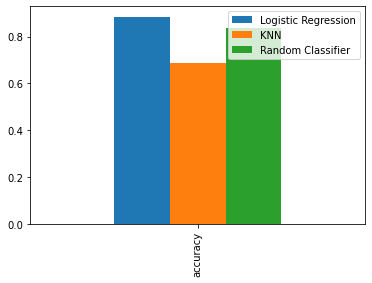

In [29]:
model_compare.plot(kind='bar');

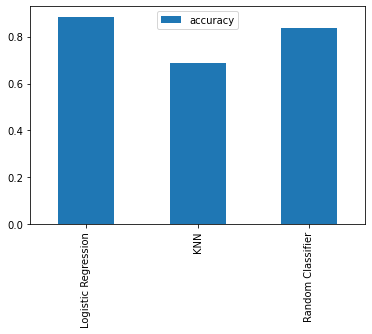

In [30]:
model_compare.T.plot(kind='bar');

Now we've got a baseline model

lets look at the following:

* Hyperparamter tuning
* feature importance
* Confusion matrix
* Cross_validation
* Precision
* Recall
* F1 scor
* classification report 
* ROC curve 
* Area under the curve

## Hyperparameter tuning 

In [31]:
# create a list of test and train score 

train_score = []
test_score = []

# create a list of different value for nneighbors 
neighbors = range(1,21)

# setup knn instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit into the model
    knn.fit(X_train,y_train)
    
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [32]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

the maximum accuracy score for knn model is:75.41


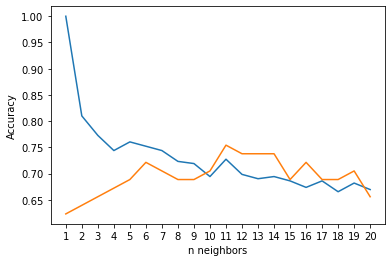

In [34]:
plt.plot(neighbors,train_score,label='train score')
plt.plot(neighbors,test_score,label='test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('n neighbors')
plt.ylabel('Accuracy');

print(f'the maximum accuracy score for knn model is:{max(test_score)*100:.2f}')

In [35]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

## Hyperparameter tuning using RandomizedSearchCV

we're going to tunr :
* logisticRegression()
* RandomForestClassifier()

In [36]:
# create a hyperparameter grid for logistic Regression 

log_reg_grid = {
    "C":np.logspace(-4,4,50),
    "solver":['liblinear']
}

rf_grid = {
    'n_estimators':np.arange(10,5000,50),
    'max_depth':[None,3,5,30],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [37]:
# tune Logistic Regression

np.random.seed(42)

# setup random hyperparameter search for Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=50,verbose=2)

rs_log_reg.fit(X_train,y_train)

rs_log_reg.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, sol

[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=5.4

[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s


{'solver': 'liblinear', 'C': 0.18420699693267145}

In [38]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [39]:
# Tune RandomForestClassifier

In [40]:
np.random.seed(42)

# setup random hyperparamgter search for Random Forest classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           verbose=2,
                           n_iter=20)

# fit random hyperparameter search for Random Forest classifier

rs_rf.fit(X_train,y_train)

rs_rf.score(X_test,y_test)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=4760; total time=   5.8s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=4760; total time=   4.3s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=4760; total time=   4.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=4760; total time=   4.3s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=4760; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=3010; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=3010; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=3010; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=3010; total time=   2.7s
[CV

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=4010; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=2910; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=2910; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=2910; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=2910; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=2910; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=2110; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=2110; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=2110; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=211

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

Since logistic Regression model provides the best score so far we try to improve it


In [96]:
# Different Hyperparameters for Logistic Regression Model
np.random.seed(42)
gs_log_grid = {'C':np.logspace(-5,5,50),
              'solver':['liblinear','newton-cg']}

# setup grid hyperparameter search for Logistic Regression

gs_log_reg = GridSearchCV(LogisticRegression(penalty='l2'),param_grid=gs_log_grid,cv=5,verbose=2)

# fit the hyperparameter for Logistic Regression

gs_log_reg.fit(X_train,y_train)

# get the best best hyperparameters
gs_log_reg.best_params_



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=1e-05, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=1e-05, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=1e-05, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=1e-05, solver=newton-cg; total time=   0.0s
[CV] END .........C=1.5998587196060572e-05, solver=liblinear; total time=   0.0s
[CV] END .........C=1.5998587196060572e-05, so

[CV] END ...........C=0.001757510624854793, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.001757510624854793, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.001757510624854793, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.002811768697974231, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0028

[CV] END ............C=0.30888435964774846, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=liblinear; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=liblinear; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=liblinear; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=liblinear; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=liblinear; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.49417133613238384, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.7906043210907702, solver=liblinear; total time=   0.0s
[CV] END .............C=0.79

[CV] END .............C=54.286754393238596, solver=newton-cg; total time=   0.0s
[CV] END .............C=54.286754393238596, solver=newton-cg; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=liblinear; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=liblinear; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=liblinear; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=liblinear; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=liblinear; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=newton-cg; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=newton-cg; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=newton-cg; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=newton-cg; total time=   0.0s
[CV] END ..............C=86.85113737513521, solver=newton-cg; total time=   0.0s
[CV] END ..............C=138

[CV] END ..............C=9540.954763499964, solver=newton-cg; total time=   0.0s
[CV] END ..............C=9540.954763499964, solver=newton-cg; total time=   0.0s
[CV] END ..............C=9540.954763499964, solver=newton-cg; total time=   0.0s
[CV] END ..............C=9540.954763499964, solver=newton-cg; total time=   0.0s
[CV] END ..............C=9540.954763499964, solver=newton-cg; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=liblinear; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=liblinear; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=liblinear; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=liblinear; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=liblinear; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=newton-cg; total time=   0.0s
[CV] END .............C=15264.179671752365, solver=newton-cg; total time=   0.0s
[CV] END .............C=1526

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [98]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyond classifier

* ROC Curve
* AUC Score
* Classification report
* precision
* Recall
* F1-score

In [43]:
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [45]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\Miracle\ml-projects\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


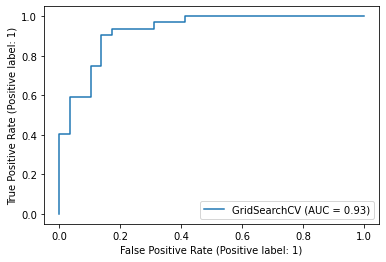

In [46]:
plot_roc_curve(gs_log_reg,X_test,y_test)

In [47]:
# confusion matrix

conf_mat = confusion_matrix(y_test,y_preds)

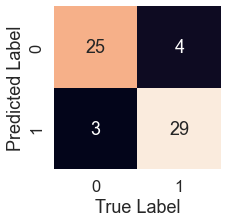

In [48]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_preds):
    '''
    plotting the confusion matrix
    
    '''
    ax,fig = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),cbar=False,annot=True)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_confusion_matrix(y_test,y_preds)

calculating classification report , cross-validated precision , recall and f1-score

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation

Now we are going to calculate the accuracy , precision , f1_score using cross validation method

In [50]:
gs_log_reg.best_params_

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best params 

clf = LogisticRegression(C=0.19306977288832497,solver='liblinear')


In [52]:
# cross validated score using accuracy , f1_score and recall

cv_scoring_methods = ['accuracy','precision','recall','f1']

cv_methods = {}

def clf_score(clf,X,y):
    for method in cv_scoring_methods: 
        
        cv_methods[method]=cross_val_score(clf,X,y,scoring=method,cv=5).mean()
        
    return cv_methods

score = clf_score(clf,X,y)

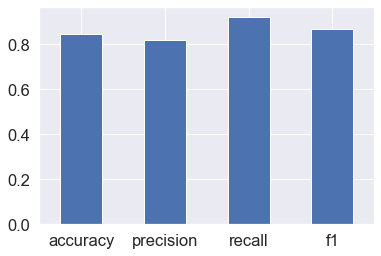

In [53]:
pd.DataFrame(score,index=[0]).T.plot(kind='bar',legend=False)
plt.xticks(rotation=0);

## Feature Importance


-which features contributed most of the outcome of the model 

In [56]:
gs_log_reg.best_params_

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [62]:
clf = LogisticRegression(C=0.19306977288832497,solver='liblinear')

clf.fit(X_train,y_train)

clf.coef_

array([[ 0.00293141, -0.84021575,  0.6544625 , -0.01156965, -0.00164466,
         0.04206065,  0.3055241 ,  0.02452553, -0.59164914, -0.56551395,
         0.44194179, -0.6304657 , -0.66893179]])

In [81]:
features = dict(zip(df.columns,clf.coef_[0]))

In [82]:
dict(zip(df.columns,clf.coef_[0]))

{'age': 0.002931409805240647,
 'sex': -0.8402157478492911,
 'cp': 0.6544625042388348,
 'trestbps': -0.011569652201515379,
 'chol': -0.0016446621756997112,
 'fbs': 0.04206065014162356,
 'restecg': 0.305524100909449,
 'thalach': 0.024525525625648924,
 'exang': -0.5916491418533936,
 'oldpeak': -0.5655139549312996,
 'slope': 0.44194178877818424,
 'ca': -0.6304656970465691,
 'thal': -0.6689317949905429}

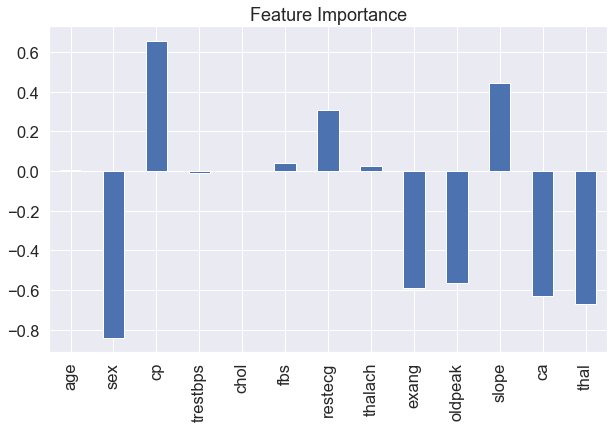

In [91]:
features_coef_df=pd.DataFrame(features,index=[0]).T.plot(kind='bar',legend=False,figsize=(10,6),title='Feature Importance')

In [92]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


# slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downslopins: signs of unhealthy heart

In [95]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
